# Customer Churn

---

<img src="./input/louis-hansel-u13IpYtZ9I8-unsplash.jpg" style="height:400px">

Photo by [Louis Hansel](https://unsplash.com/@louishansel)

## Context
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

## Inspiration
To explore this type of models and learn more about the subject.

## First insight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import f1_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [4]:
import lightgbm as lgbm
import xgboost as xgb

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [6]:
df = pd.read_csv('./input/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

The dataset contains about 7000 customers with 19 features.

**Features** are the following:
- `customerID`: a unique ID for each customer
- `gender`: the gender of the customer
- `SeniorCitizen`: whether the customer is a senior (i.e. older than 65) or not
- `Partner`: whether the customer has a partner or not
- `Dependents`: whether the customer has people to take care of or not
- `tenure`: the number of months the customer has stayed
- `PhoneService`: whether the customer has a phone service or not
- `MultipleLines`: whether the customer has multiple telephonic lines or not
- `InternetService`: the kind of internet services the customer has (DSL, Fiber optic, no)
- `OnlineSecurity`: what online security the customer has (Yes, No, No internet service)
- `OnlineBackup`: whether the customer has online backup file system (Yes, No, No internet service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: whether the customer has a streaming TV device (e.g. a TV box) or not (Yes, No, No internet service)
- `StreamingMovies`: whether the customer uses streaming movies (e.g. VOD) or not (Yes, No, No internet service)
- `Contract`: the contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has electronic billing or not (Yes, No)
- `PaymentMethod`: payment method of the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: the amount charged to the customer monthly
- `TotalCharges`: the total amount the customer paid

And the **Target** :
- `Churn`: whether the customer left or not (Yes, No)

As you can see, many features are categorical with more than 2 values. You will have to handle this.

Take time to make a proper and complete EDA: this will help you build a better model.

---

# Exploratory Data Analysis¶

Global infos on the dataset (null values, types...)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Nb of each type

In [9]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

Nb of unique value for each type

In [10]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

## Target infos

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

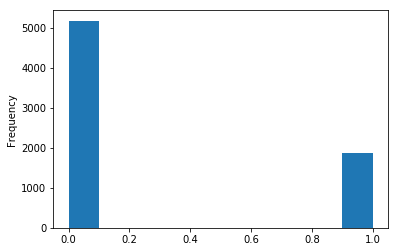

In [12]:
df['Churn'].str.replace('No', '0').str.replace('Yes', '1').astype(int).plot.hist()

Basic stats on numerical cols

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Basic cleaning

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df = df.drop(columns=['customerID'])

No missing or duplicated rows. The customer ID is irrelevant and can be dropped.

## Dealing with abnormal values

The 'TotalCharges' column has an object type, but it is supposed to contain only numerical values...Let's dig a little deeper:

In [17]:
# example for the record strip non digit values
#test = pd.Series(["U$ 192.01"])
#test.str.replace('^[^\d]*', '').astype(float)

#df.TotalCharges = df.TotalCharges.str.replace('^[^\d]*', '')

In [18]:
df.iloc[0, df.columns.get_loc("TotalCharges")]

'29.85'

In [19]:
float(df.iloc[0, df.columns.get_loc("TotalCharges")])

29.85

In [20]:
df.iloc[488, df.columns.get_loc("TotalCharges")]

' '

In [21]:
len(df[df['TotalCharges'] == ' '])

11

Drop strange/missing values (the pandas method to_numeric could also has been used!):

In [22]:
# replace missing values by 0
df.TotalCharges = df.TotalCharges.replace(" ",np.nan)

# drop missing values - side note: it represents only 11 out of 7043 rows which is not significant...
df = df.dropna()

# now we can convert the column type
df.TotalCharges = df.TotalCharges.astype('float')

df.shape

(7032, 20)

In [23]:
num_feat = df.select_dtypes(include=['float', 'int']).columns.tolist()
num_feat.remove('SeniorCitizen')    # SeniorCitizen is only a boolean
num_feat

['tenure', 'MonthlyCharges', 'TotalCharges']

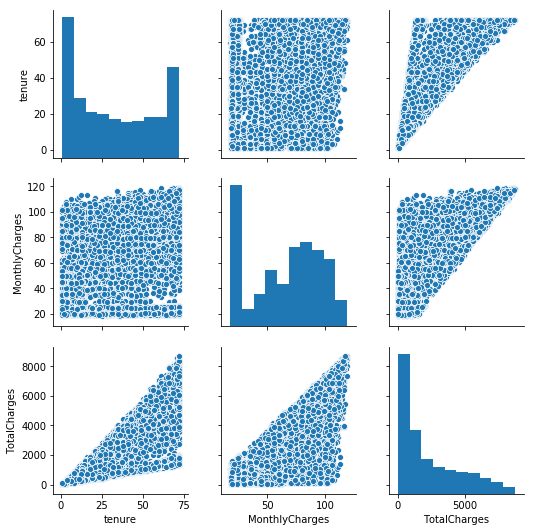

In [24]:
sns.pairplot(data=df[num_feat])
plt.show()

Plot distribution of those feat, w/ & w/o the distinction between the customers who churn

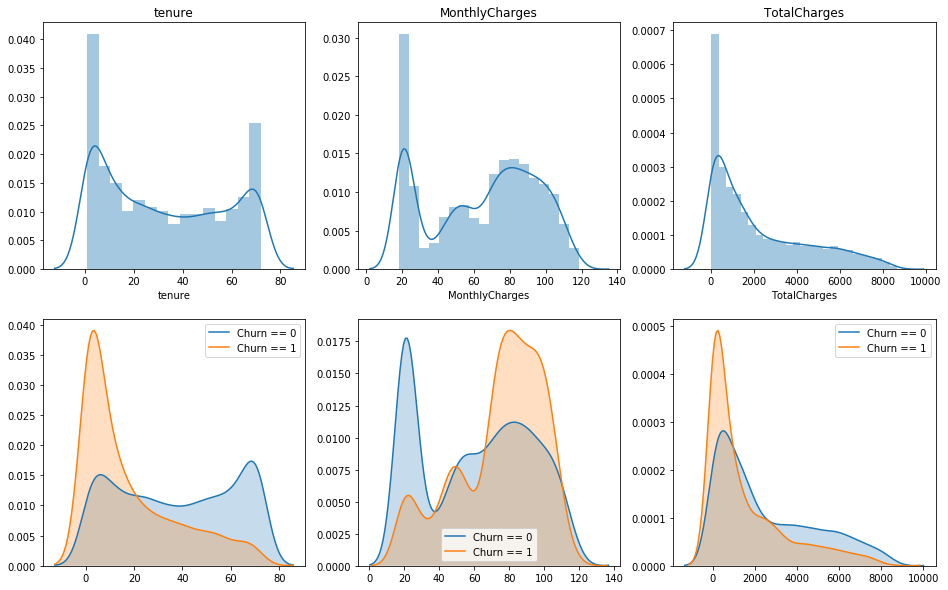

In [25]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(2, 3, 2)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(2, 3, 3)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(2, 3, 4)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'tenure'], shade=True,label = 'Churn == 0')
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'tenure'], shade=True,label = 'Churn == 1')

plt.subplot(2, 3, 5)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], shade=True,label = 'Churn == 0')
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'], shade=True,label = 'Churn == 1')

plt.subplot(2, 3, 6)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'TotalCharges'], shade=True,label = 'Churn == 0')
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'TotalCharges'], shade=True,label = 'Churn == 1')


Are there any correlations ?

In [26]:
corr = df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


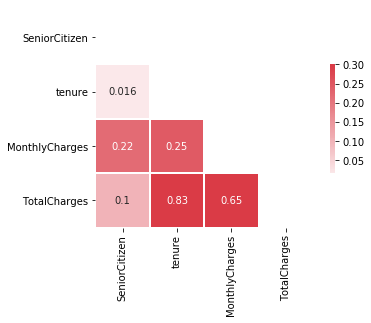

In [27]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

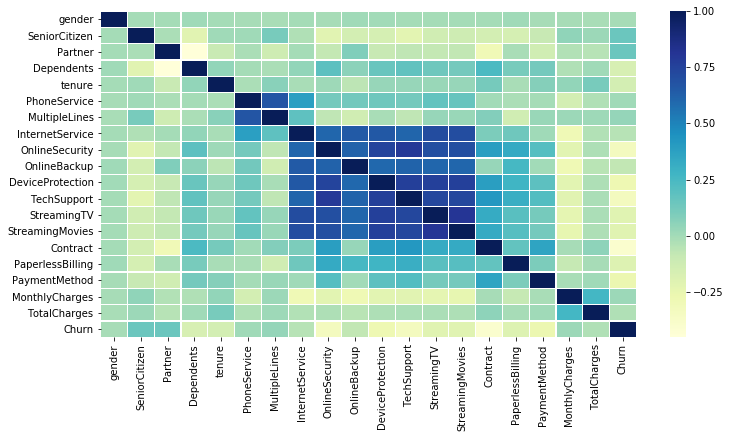

In [28]:
plt.figure(figsize=(12, 6))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

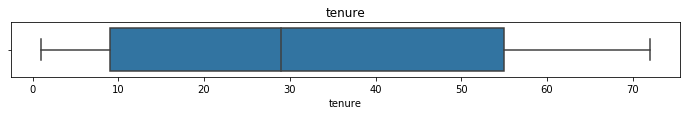

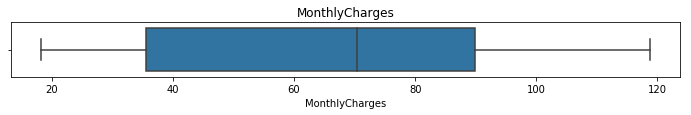

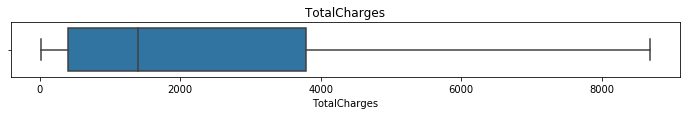

In [29]:
for c in num_feat:
    plt.figure(figsize=(12, 1))
    sns.boxplot(df[c])
    plt.title(c)
    plt.show()

In [30]:
cat_features = df.select_dtypes('object').columns.tolist()
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Plot the count of different categories for the other features (with text)

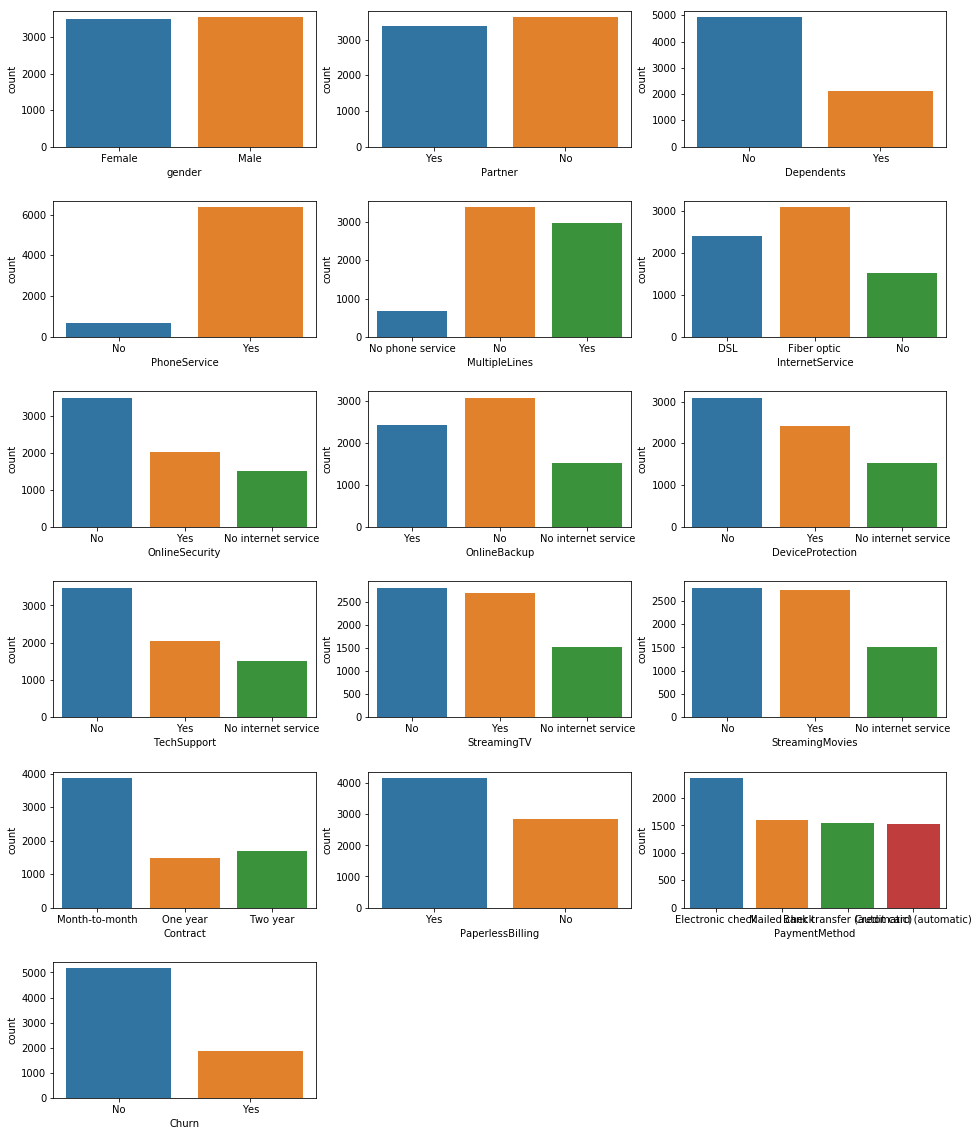

In [31]:
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(len(cat_features)):
    plt.subplot(6, 3, i+1)
    sns.countplot(df[cat_features[i]])
    #plt.title(cat_features[i])

plt.show()

Same plot but with the distinction between customers who churn

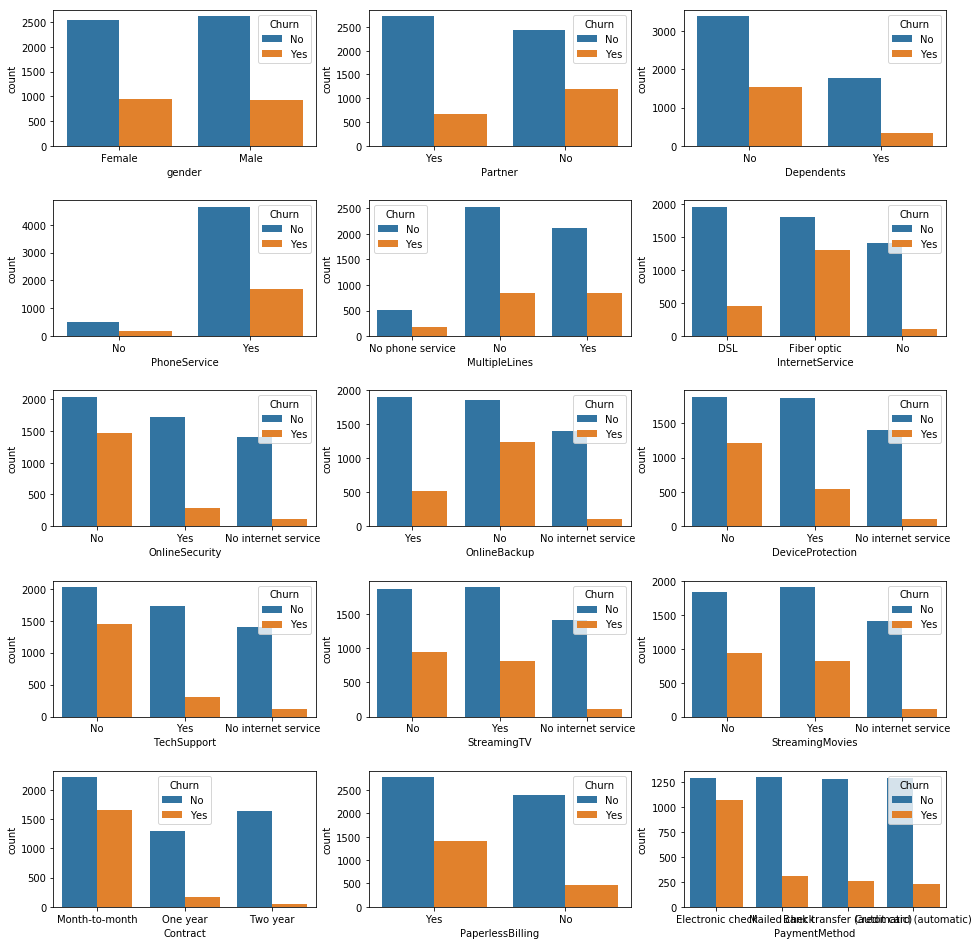

In [32]:
cat_features.remove('Churn')

plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(len(cat_features)):
    plt.subplot(6, 3, i+1)
    sns.countplot(df[cat_features[i]], hue=df['Churn'])
    #plt.title(cat_features[i])

plt.show()

---

# Data Preparation & Feature engineering

Target creation

In [33]:
y = df.Churn.str.replace('No', '0').str.replace('Yes', '1').astype(int)

Label encoding of categorical features

In [34]:
X = pd.get_dummies(data=df, columns=cat_features, drop_first=True)
X = X.drop(columns=['Churn'])

In [35]:
X.shape, y.shape

((7032, 30), (7032,))

Features creation

* In this case, it's complicated to add features from an other dataset because no information is provided with the CSV file we're using.
* All columns except the user_id are relevant, so all of them are kept.
* We can combine features to create new ones : by dividing TotalCharges with the tenure which provide a kind of charge average per month. This value compared to the Monthly charges can give an idea of the charges' evolution with time.

In [36]:
X['average_charges'] = X['TotalCharges'] / X['tenure']
X.loc[X['tenure'] == 0, 'average_charges'] = X['MonthlyCharges']
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,average_charges
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,29.850000
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,55.573529
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,54.075000
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,40.905556
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,75.825000


Scaling data

In [37]:
num_feat.append('average_charges')
scaler = MinMaxScaler()
X[num_feat] = scaler.fit_transform(X[num_feat])

/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,average_charges
0,0,0.000000,0.115423,0.001275,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.149361
1,0,0.464789,0.385075,0.215867,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.388372
2,0,0.014085,0.354229,0.010310,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.374448
3,0,0.619718,0.239303,0.210241,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0.252084
4,0,0.014085,0.521891,0.015330,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.576539


Splitting train and test sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Features importances

In [40]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[:10]

,importance
TotalCharges,0.167416
tenure,0.150908
average_charges,0.137030
MonthlyCharges,0.134679
PaymentMethod_Electronic check,0.034640
InternetService_Fiber optic,0.034376
Contract_Two year,0.032602
gender_Male,0.024216
OnlineSecurity_Yes,0.022954
PaperlessBilling_Yes,0.022600


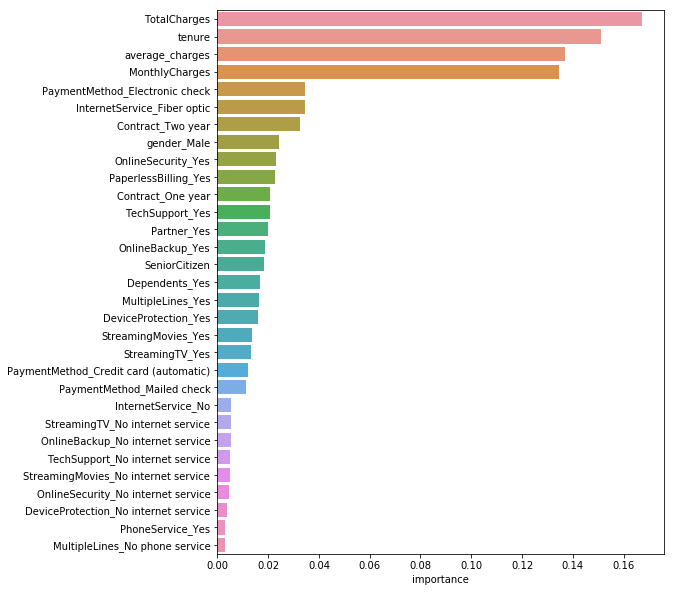

In [42]:
plt.figure(figsize=(8, 10))
sns.barplot(x="importance", y=feature_importances.index, data=feature_importances)
plt.show()

---

# Baselines

In [43]:
# f1_score binary by default
def get_f1_scores(clf, model_name):
    y_train_pred, y_pred = clf.predict(X_train), clf.predict(X_test)
    print(model_name, f'\t - Training F1 score = {f1_score(y_train, y_train_pred) * 100:.2f}% / Test F1 score = {f1_score(y_test, y_pred)  * 100:.2f}%')

In [44]:
model_list = [RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    LinearSVC(),
    SGDClassifier(),
    lgbm.LGBMClassifier(),
    xgb.XGBClassifier()
             ]

In [45]:
model_names = [str(m)[:str(m).index('(')] for m in model_list]

In [46]:
for model, name in zip(model_list, model_names):
    model.fit(X_train, y_train)
    get_f1_scores(model, name)

RandomForestClassifier 	 - Training F1 score = 95.88% / Test F1 score = 51.62%
LogisticRegression 	 - Training F1 score = 60.45% / Test F1 score = 56.12%
SVC 	 - Training F1 score = 58.92% / Test F1 score = 54.46%
LinearSVC 	 - Training F1 score = 59.91% / Test F1 score = 56.36%
SGDClassifier 	 - Training F1 score = 40.85% / Test F1 score = 36.83%
LGBMClassifier 	 - Training F1 score = 76.50% / Test F1 score = 57.02%
XGBClassifier 	 - Training F1 score = 62.61% / Test F1 score = 58.36%


The 1st model - RandomForrest Clf - is clearly overfitting the train dataset and can't generalize. The others models don't have good results and are probably underfitting. So let's tuned them !

---

# Training more accurately other models

## Randomforest with weighted classes

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
get_f1_scores(rfc, 'RandomForest')

RandomForest 	 - Training F1 score = 96.83% / Test F1 score = 48.52%


In [48]:
y.sum(), len(y) - y.sum()

(1869, 5163)

In [49]:
rfc = RandomForestClassifier(class_weight={1:1869, 0:5174})
rfc.fit(X_train, y_train)
get_f1_scores(rfc, 'RandomForest weighted')

RandomForest weighted 	 - Training F1 score = 96.35% / Test F1 score = 51.89%


The improvement is not significant...

## LGBM with weighted classes

In [50]:
lgbm_w = lgbm.LGBMClassifier(n_jobs = -1, class_weight={0:1869, 1:5174})
lgbm_w.fit(X_train, y_train)
get_f1_scores(lgbm_w, 'LGBM weighted')

LGBM weighted 	 - Training F1 score = 78.76% / Test F1 score = 63.03%


## XGB with ratio

In [51]:
ratio = ((len(y) - y.sum()) - y.sum()) / y.sum()
ratio

1.7624398073836276

In [52]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=ratio)
xgb_model.fit(X_train, y_train)
get_f1_scores(xgb_model, 'XGB with ratio')

XGB with ratio 	 - Training F1 score = 66.48% / Test F1 score = 63.47%


That's a little better.

## Adaboost

In [53]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
get_f1_scores(abc, 'Adaboost')

Adaboost 	 - Training F1 score = 60.75% / Test F1 score = 58.05%


---

# Using GridsearchCV & Combining the best models

With XGB

In [54]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1018
           1       0.58      0.70      0.63       389

   micro avg       0.78      0.78      0.78      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.79      0.78      0.78      1407



Let's use a GridSearch with 5 cross validation to tuned the hyperparameters

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = {'learning_rate':[0.175, 0.167, 0.165, 0.163, 0.17], 
          'max_depth':[1, 2, 3],
          'scale_pos_weight':[1.70, 1.73, 1.76, 1.79]}
clf_grid = GridSearchCV(xgb.XGBClassifier(), param_grid=params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.175, 0.167, 0.165, 0.163, 0.17], 'max_depth': [1, 2, 3], 'scale_pos_weight': [1.7, 1.73, 1.76, 1.79]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [57]:
clf_grid.best_score_

0.635398553168061

In [58]:
clf_grid.best_params_

{'learning_rate': 0.163, 'max_depth': 1, 'scale_pos_weight': 1.76}

With a LogisticRegression

In [59]:
lr = LogisticRegression(C=10, class_weight={0:0.26, 1:0.74})

In [60]:
lr.fit(X_train, y_train)
get_f1_scores(lr, 'Logistic Reg')

Logistic Reg 	 - Training F1 score = 62.82% / Test F1 score = 64.88%


Now we can try to combine the best models

In [61]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.167, max_depth=2, scale_pos_weight=1.73)
xgb_model.fit(X_train, y_train)
get_f1_scores(xgb_model, 'XGB with ratio')

XGB with ratio 	 - Training F1 score = 66.17% / Test F1 score = 63.93%


In [62]:
y_pred_lr = lr.predict_proba(X_test)

In [63]:
lgbm_w = lgbm.LGBMClassifier(n_jobs = -1, class_weight={0:1869, 1:5174})
lgbm_w.fit(X_train, y_train)
y_pred_lgbm = lgbm_w.predict_proba(X_test)

In [65]:
# y_pred with predict_proba returns 2 cols, one for each class
y_pred_xgb = xgb_model.predict_proba(X_test)
y_pred_xgb[:5, 1]

array([0.66343373, 0.6869538 , 0.031379  , 0.49967214, 0.06845096],
      dtype=float32)

In [66]:
y_pred_lgbm[:5, 1]

array([0.65824753, 0.73075217, 0.06651954, 0.50086417, 0.0424213 ])

In [67]:
test = np.vstack((y_pred_lgbm[:5, 1], y_pred_xgb[:5, 1]))
test

array([[0.65824753, 0.73075217, 0.06651954, 0.50086417, 0.0424213 ],
       [0.66343373, 0.68695378, 0.031379  , 0.49967214, 0.06845096]])

In [68]:
np.mean(test, axis=0)

array([0.66084063, 0.70885298, 0.04894927, 0.50026816, 0.05543613])

In [69]:
y_pred_mean = np.mean(np.vstack((y_pred_lgbm[:, 1], y_pred_xgb[:, 1])), axis=0)
y_pred_mean[:5]

array([0.66084063, 0.70885298, 0.04894927, 0.50026816, 0.05543613])

In [70]:
y_pred_mean[y_pred_mean < 0.5] = 0
y_pred_mean[y_pred_mean > 0.5] = 1
y_pred_mean[:5]

array([1., 1., 0., 1., 0.])

In [71]:
print(f'F1 score of models combined on the test dataset = {f1_score(y_test, y_pred_mean)  * 100:.2f}%')

F1 score of models combined on the test dataset = 63.59%


Despite combining model, the best F1 score is still obtained by XGB with tuned hyperparameters.